In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image

Import of ML algorithms

In [2]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn import model_selection

In [4]:
df = pd.read_csv("Data\\train.csv")

In [5]:
print(f"Shape: {df.shape}")
df.head(10)

Shape: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
seed = 0
X = df.iloc[:, 1:].copy().values
y = df['label'].copy().values

### Shift

In [7]:
from img_manipulation import shift_image

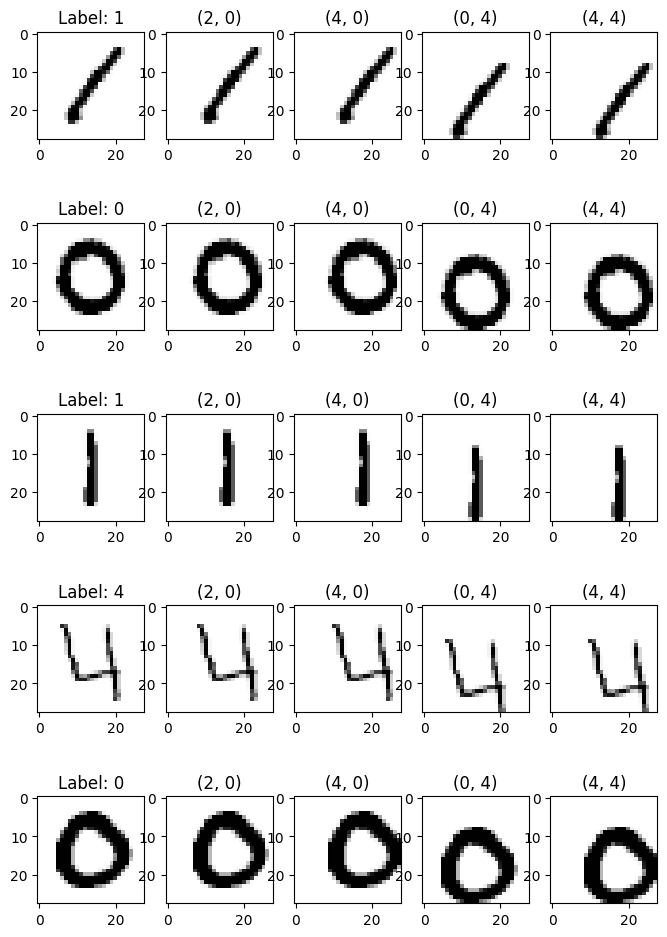

In [8]:
shifts = [
    (2,0),
    (4,0),
    (0,4),
    (4,4)
]

nrows = 5
ncols = len(shifts) + 1
i = 0

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,12))
for r in range(nrows):
    arr = df.iloc[i, 1:].to_numpy().reshape((28,28))
    ax[r, 0].imshow(arr, cmap="Greys")
    ax[r, 0].set_title(f"Label: {df.iloc[i, 0]}")
    for c in range(1, ncols):
        arr_shifted = shift_image(arr, shifts[c-1][0], shifts[c-1][1])
        ax[r, c].imshow(arr_shifted, cmap="Greys")
        ax[r, c].set_title(shifts[c-1])

    i += 1 

### Rotation

In [9]:
from img_manipulation import rotate_image

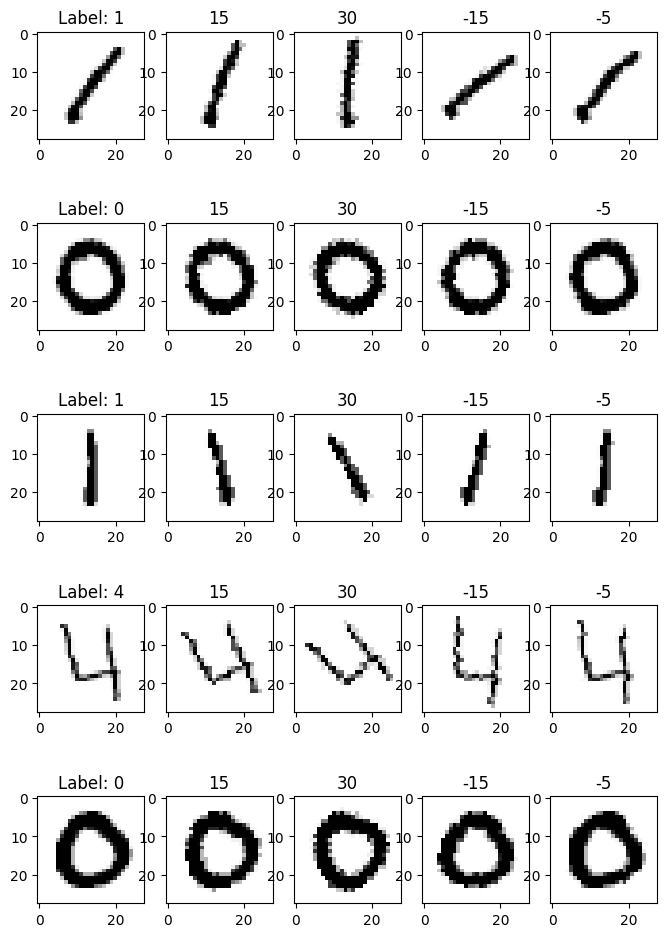

In [10]:
rotations = [
    15,
    30,
    -15,
    -5
]

nrows = 5
ncols = len(shifts) + 1
i = 0

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,12))
for r in range(nrows):
    arr = df.iloc[i, 1:].to_numpy().reshape((28,28))
    ax[r, 0].imshow(arr, cmap="Greys")
    ax[r, 0].set_title(f"Label: {df.iloc[i, 0]}")
    for c in range(1, ncols):
        arr_rotated = rotate_image(arr, rotations[c-1])
        ax[r, c].imshow(arr_rotated, cmap="Greys")
        ax[r, c].set_title(rotations[c-1])

    i += 1 

### Zoom-in and zoom-out

In [11]:
from img_manipulation import zoom_image

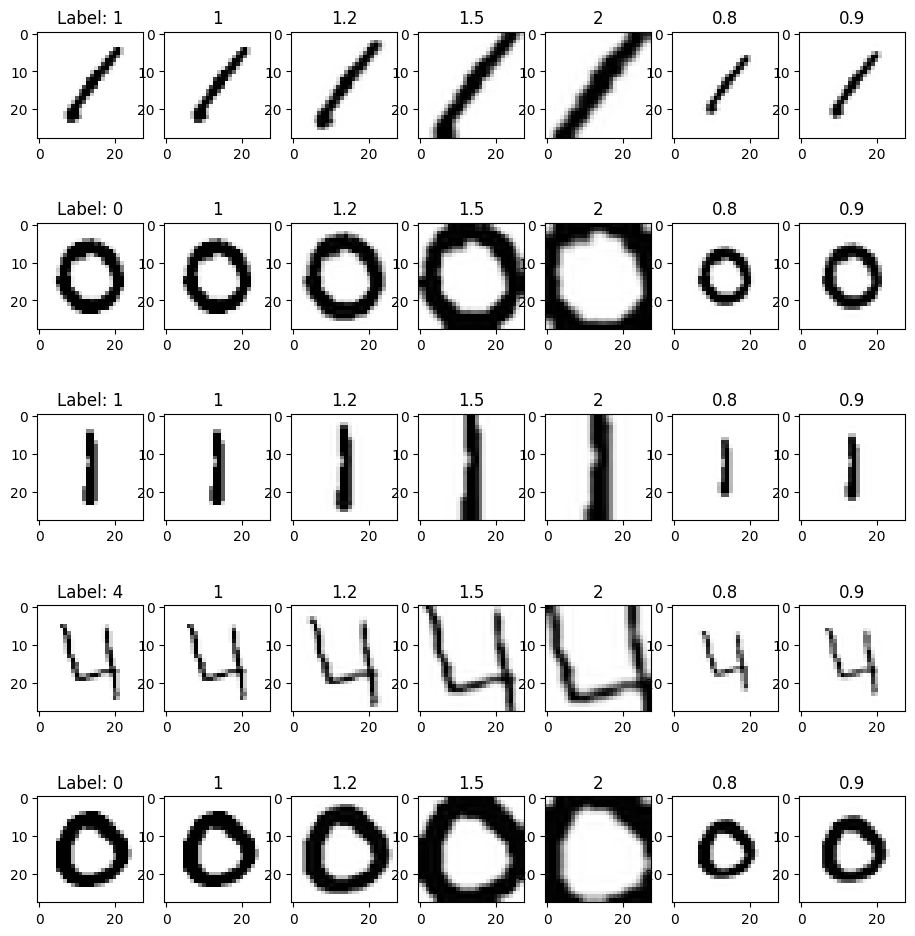

In [13]:
zooms = [
    1,
    1.2,
    1.5,
    2,
    0.8,
    0.9
]

nrows = 5
ncols = len(zooms) + 1
i = 0

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(1.6 * ncols, 12))
for r in range(nrows):
    arr = df.iloc[i, 1:].to_numpy().reshape((28,28))
    ax[r, 0].imshow(arr, cmap="Greys")
    ax[r, 0].set_title(f"Label: {df.iloc[i, 0]}")
    for c in range(1, ncols):
        arr_rotated = zoom_image(arr, zooms[c-1])
        ax[r, c].imshow(arr_rotated, cmap="Greys")
        ax[r, c].set_title(zooms[c-1])

    i += 1 

### Noise

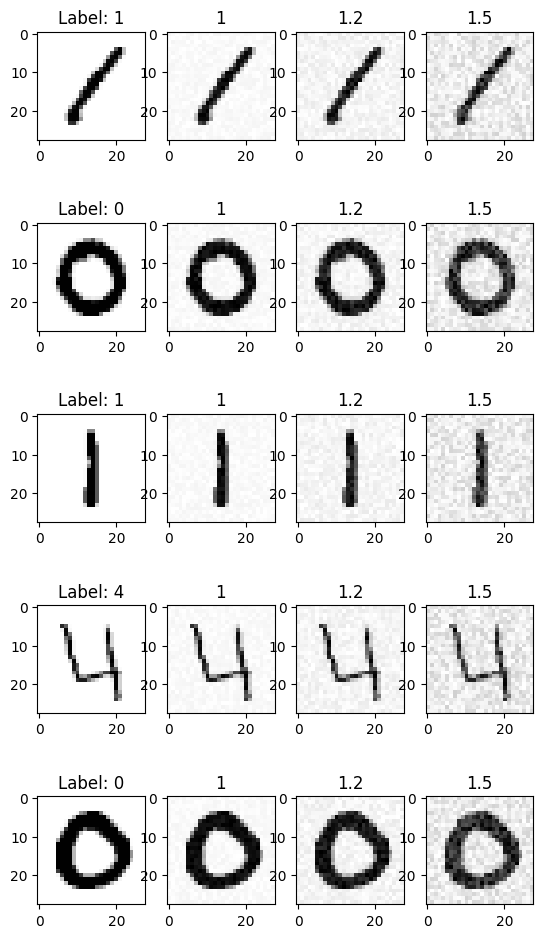

In [26]:
noise_max_val = [25, 50, 100]

nrows = 5
ncols = len(noise_max_val) + 1
i = 0

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(1.6 * ncols, 12))
for r in range(nrows):
    arr = df.iloc[i, 1:].to_numpy().reshape((28,28))
    ax[r, 0].imshow(arr, cmap="Greys")
    ax[r, 0].set_title(f"Label: {df.iloc[i, 0]}")
    for c in range(1, ncols):
        arr_with_noise = arr + np.random.randint(0, noise_max_val[c-1], size = arr.shape)
        ax[r, c].imshow(arr_with_noise, cmap="Greys")
        ax[r, c].set_title(zooms[c-1])

    i += 1 